# Sentiment Analysis

## Data Loading

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Load the IMDB Movie Reviews dataset from the datasets library
from datasets import load_dataset
dataset = load_dataset('imdb')

In [60]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [61]:
# Load the training and testing datasets into pandas dataframes
df_train = dataset['train'].to_pandas()
df_test = dataset['test'].to_pandas()
print("Training Set:\n", df_train.head())
print("\n------------------------------------------------------------\n")
print("Test set:\n", df_test.head())

Training Set:
                                                 text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0

------------------------------------------------------------

Test set:
                                                 text  label
0  I love sci-fi and am willing to put up with a ...      0
1  Worth the entertainment value of a rental, esp...      0
2  its a totally average film with a few semi-alr...      0
3  STAR RATING: ***** Saturday Night **** Friday ...      0
4  First off let me say, If you haven't enjoyed a...      0


## Exploratory Data Analysis

In [62]:
# Check the shape of the datasets
print(df_train.shape, df_test.shape)

(25000, 2) (25000, 2)


In [63]:
# Display basic information about the training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [64]:
# Display basic information about the testing dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


### Duplicates

In [65]:
print("Training duplicates:", df_train.duplicated().sum())
print("Test duplicates:", df_test.duplicated().sum())

Training duplicates: 96
Test duplicates: 199


In [66]:
# Remove duplicates
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

# Check the shape of the datasets after removing duplicates
print("Training set after removing duplicates:", df_train.shape)
print("Test set after removing duplicates:", df_test.shape)

Training set after removing duplicates: (24904, 2)
Test set after removing duplicates: (24801, 2)


### Missing Values

In [67]:
# Check missing values in the training dataset
df_train.isnull().sum().sort_values(ascending=False)

text     0
label    0
dtype: int64

In [68]:
# Check missing values in the testing dataset
print(df_test.isnull().sum().sort_values(ascending=False))

text     0
label    0
dtype: int64


There are NO missing values in the training and testing datasets.

### Data Types

Convert the data type of 'label' to `object` as it is a categorical variable. 

In [90]:
# Convert the data type of label to 'object'
df_train['label'] = df_train['label'].astype('category')
df_test['label'] = df_test['label'].astype('category')

# Display the data types of the training and testing datasets
print("Training dataset data types:\n", df_train.dtypes)
print("\nTesting dataset data types:\n", df_test.dtypes)

Training dataset data types:
 text       object
label    category
dtype: object

Testing dataset data types:
 text       object
label    category
dtype: object


### Descriptive Statistics

In [93]:
df_train.describe()

,text,label
count,24904,24904
unique,24903,2
top,how tasty wa my little frenchman tell a story ...,1
freq,2,12472


In [96]:
df_test.describe()

,text,label
count,24801,24801
unique,24800,2
top,this is yet another pseudointellectual let mak...,1
freq,2,12440


There are 2 unique sentiment labels in the training and test sets.

#### Unique Sentiment labels

In [97]:
df_train['label'].unique().tolist()

[0, 1]

Following are the unique sentiments:

`0` - Negative\
`1` - Positive

### Distribution of Sentiment

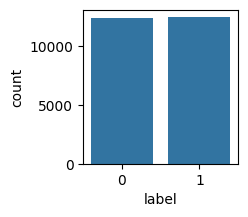

In [98]:
# Create a countplot to show the distribution of sentiments or labels
fig = plt.figure(figsize=(2, 2))
sns.countplot(x='label', data=df_train)
plt.show()

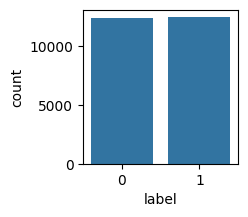

In [99]:
# Create a countplot to show the distribution of sentiments or labels
fig = plt.figure(figsize=(2, 2))
sns.countplot(x='label', data=df_test)
plt.show()

## Text Preprocessing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

In [101]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Function to remove URLs from text
def remove_urls(text):
    return re.sub(r'http[s]?://\S+', '', text)

# Function to remove punctuations from text
def remove_punctuation(text):
    regular_punct = string.punctuation
    return str(re.sub(r'['+regular_punct+']', '', str(text)))

# Function to convert the text into lower case
def lower_case(text):
    return text.lower()

# Function to lemmatize text
def lemmatize(text):
  wordnet_lemmatizer = WordNetLemmatizer()

  tokens = nltk.word_tokenize(text)
  lemma_txt = ''
  for w in tokens:
    lemma_txt = lemma_txt + wordnet_lemmatizer.lemmatize(w) + ' '

  return lemma_txt

In [102]:
# Apply the preprocessing functions to the training and test datasets
df_train['text'] = df_train['text'].apply(remove_urls)
df_train['text'] = df_train['text'].apply(remove_punctuation)
df_train['text'] = df_train['text'].apply(lower_case)
df_train['text'] = df_train['text'].apply(lemmatize)

df_test['text'] = df_test['text'].apply(remove_urls)
df_test['text'] = df_test['text'].apply(remove_punctuation)
df_test['text'] = df_test['text'].apply(lower_case)
df_test['text'] = df_test['text'].apply(lemmatize)

print(df_train.head())
print(df_test.head())

                                                text label
0  i rented i am curiousyellow from my video stor...     0
1  i am curious yellow is a risible and pretentio...     0
2  if only to avoid making this type of film in t...     0
3  this film wa probably inspired by godard mascu...     0
4  oh brotherafter hearing about this ridiculous ...     0
                                                text label
0  i love scifi and am willing to put up with a l...     0
1  worth the entertainment value of a rental espe...     0
2  it a totally average film with a few semialrig...     0
3  star rating saturday night friday night friday...     0
4  first off let me say if you havent enjoyed a v...     0


## TF-IDF Vectorization

In [130]:
# Apply TF-IDF vectorization to the training set
from sklearn import feature_extraction
tfidf = feature_extraction.text.TfidfVectorizer()
X = tfidf.fit_transform(df_train['text'])
y = df_train['label']

In [131]:
X.shape, y.shape

((24904, 111794), (24904,))

## Logistic Regression

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [133]:
# train test split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

LogisticRegression()

In [135]:
y_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred)

print("Validation Accuracy =", val_accuracy)

# Print the classification report
val_report = classification_report(y_val, y_pred)
print("\nClassification Report:\n")
print(val_report)

Validation Accuracy = 0.8964063441076089

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2511
           1       0.89      0.91      0.90      2470

    accuracy                           0.90      4981
   macro avg       0.90      0.90      0.90      4981
weighted avg       0.90      0.90      0.90      4981



### **Validation Accuracy: 0.90**

## Model Evaluation

In [136]:
# Apply TF_IDF vectorization to the test set
X_test = tfidf.transform(df_test['text'])
y_test = df_test['label']

In [138]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy =", test_accuracy)

# Print the classification report
test_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n")
print(test_report)

Test Accuracy = 0.8799645175597758

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12361
           1       0.88      0.88      0.88     12440

    accuracy                           0.88     24801
   macro avg       0.88      0.88      0.88     24801
weighted avg       0.88      0.88      0.88     24801



### **Test Accuracy: 0.88**

## Model Deployment

### Save the Model

In [139]:
import pickle

# Define the file path where you want to save the trained model
model_file_path = "logistic_regression_model.pkl"

# Save the trained Logistic Regression model to a file
with open(model_file_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Trained model saved to {model_file_path}")

Trained model saved to logistic_regression_model.pkl


### Save the TF-IDF Vectorizer 

In [190]:
# Define the file path where you want to save the TF-IDF vectorizer
vectorizer_file_path = "tfidf_vectorizer.pkl"

# Save the fitted TF-IDF vectorizer to a file
with open(vectorizer_file_path, 'wb') as file:
    pickle.dump(tfidf, file)

print(f"TF-IDF vectorizer saved to {vectorizer_file_path}")

TF-IDF vectorizer saved to tfidf_vectorizer.pkl


### Load the Model

In [140]:
# Define the file path where the trained model is saved
model_file_path = "logistic_regression_model.pkl"

# Load the saved Logistic Regression model from the file
with open(model_file_path, 'rb') as file:
    loaded_model = pickle.load(file)

print("Trained model loaded successfully")

Trained model loaded successfully


### Load the TF-IDF Vectorizer  

In [194]:
# Define the file path where the TF-IDF vectorizer is saved
vectorizer_file_path = "tfidf_vectorizer.pkl"

# Load the saved TF-IDF vectorizer from the file
with open(vectorizer_file_path, 'rb') as file:
    loaded_vectorizer = pickle.load(file)

print("TF-IDF vectorizer loaded successfully")

TF-IDF vectorizer loaded successfully


### Generate inference using the trained model

In [195]:
# Sample Text 1:
input_text = "Great movie. I liked it!"

# Preprocess the input text
input_text = remove_urls(input_text)
input_text = remove_punctuation(input_text)
input_text = lower_case(input_text)
input_text = lemmatize(input_text)

# Apply TF-IDF vectorization
input_text = [input_text]
input_text = loaded_vectorizer.transform(input_text)

predicted_sentiment = loaded_model.predict(input_text)
if predicted_sentiment == 0:
    print("Sentiment: Negative")
else:
    print("Sentiment: Positive")

Sentiment: Positive


In [196]:
# Sample Text 1:
input_text = "Very bad movie, I hate it!"

# Preprocess the input text
input_text = remove_urls(input_text)
input_text = remove_punctuation(input_text)
input_text = lower_case(input_text)
input_text = lemmatize(input_text)

# Apply TF-IDF vectorization
input_text = [input_text]
input_text = tfidf.transform(input_text)

predicted_sentiment = loaded_model.predict(input_text)
if predicted_sentiment == 0:
    print("Sentiment: Negative")
else:
    print("Sentiment: Positive")

Sentiment: Negative


## FastAPI 

In [ ]:
!ngrok config add-authtoken YOUR_AUTHTOKEN

In [ ]:
from fastapi import FastAPI
import nest_asyncio
from pyngrok import ngrok
import uvicorn

app = FastAPI()

def preprocess(input_text):
    # Preprocess the input text
    input_text = remove_urls(input_text)
    input_text = remove_punctuation(input_text)
    input_text = lower_case(input_text)
    input_text = lemmatize(input_text)

    # Apply TF-IDF vectorization
    input_text = [input_text]
    input_text = tfidf.transform(input_text)

    return input_text

@app.get('/')
async def welcome():
  return "Welcome to our Sentiment Analysis API"

@app.get('/{input_text}')
async def predict_sentiment(input_text):
  predicted_sentiment = loaded_model.predict(preprocess(input_text))
  if predicted_sentiment == 0:
    sentiment = "Sentiment: Negative"
  else:
    sentiment = "Sentiment: Positive"
  return sentiment
          
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)